# **Airbnb Price Prediction**
***
*Advanced Data Analytics for Managment Support/Assignment Subbmission/Ozan Ayhan*

***

## **1. Data Inspection** 

**Importing Necessery Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install numpy pandas scikit-learn matplotlib
!pip install nltk
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

!pip install folium
import folium
from folium.plugins import FastMarkerCluster

!pip install geopy
import pandas as pd
from geopy.distance import geodesic

import re
import time



  Using cached nltk-3.8.1-py3-none-any.whl (1.5 MB)
  Using cached regex-2023.8.8-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (771 kB)
  Using cached folium-0.14.0-py2.py3-none-any.whl (102 kB)
  Using cached branca-0.6.0-py3-none-any.whl (24 kB)
  Using cached geopy-2.3.0-py3-none-any.whl (119 kB)
  Using cached geographiclib-2.0-py3-none-any.whl (40 kB)


**Adjusting Row Column Settings**

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

**Data Loading**

In [133]:
listings = pd.read_csv('train.csv')
listings.shape

(55284, 42)

In [32]:
listings.head()

,name,summary,space,description,experiences_offered,neighborhood_overview,transit,house_rules,picture_url,host_id,host_since,host_response_time,host_response_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,zipcode,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,guests_included,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,cancellation_policy,reviews_per_month,listing_id
0,Attic Room in historic Greenwich,The room does not have a door but its own disc...,Double room available in historic royal Greenw...,The room does not have a door but its own disc...,business,NaN,Parking is restricted in London. Visitors park...,no shoes on carpets no food in attic room no o...,https://a0.muscache.com/im/pictures/20045164/7...,2167992,2012-04-18,within an hour,100%,t,1.00,t,f,Greenwich,Greenwich,SE10 8SX,51.47,-0.01,Townhouse,Private room,2,1.00,1.00,1.00,Pull-out Sofa,"{Wifi,""Paid parking off premises"",Heating,Wash...",35.00,1,95.00,10.00,10.00,10.00,10.00,10.00,10.00,strict_14_with_grace_period,2.37,9Q1RD6H7IO
1,Lovely Garden Studio Private Access,"Garden studio with private entrance, 5 minutes...","Beautiful studio with a king size bed, a sofa ...","Garden studio with private entrance, 5 minutes...",none,Crouch End is a very hip and friendly neighbou...,Walk across the street to the W3 bus stop and ...,We'd love it if you would remove your shoes at...,https://a0.muscache.com/im/pictures/8d1ddcdc-f...,16148175,2014-05-29,within a few hours,100%,t,1.00,t,t,LB of Haringey,Haringey,N8 8NR,51.58,-0.12,Guesthouse,Private room,2,1.00,1.00,1.00,Real Bed,"{TV,Wifi,""Free parking on premises"",Breakfast,...",75.00,2,99.00,10.00,10.00,10.00,10.00,10.00,10.00,moderate,2.97,6XDPZPGLSR
2,Comfi apartment 2 close to wimbledon tennis court,NaN,NaN,NaN,none,NaN,NaN,1- No party or event allowed. 2-No smoking ins...,https://a0.muscache.com/im/pictures/e7e4a740-d...,272000199,2019-06-28,within an hour,100%,f,2.00,t,f,LB of Merton,Merton,SW19 1DG,51.42,-0.19,Apartment,Entire home/apt,5,1.00,1.00,2.00,Real Bed,"{Wifi,Kitchen,""Paid parking off premises"",Heat...",120.00,2,84.00,9.00,9.00,10.00,10.00,9.00,8.00,strict_14_with_grace_period,1.73,SND9OPN6IY
3,Luxury room in the heart of London - SW4,Luxury first floor Victorian split level maiso...,"Your room will be fully furnished, and it will...",Luxury first floor Victorian split level maiso...,none,"Gail coffee shop, just round the corner as wel...",Happy to advise on things to do in London and ...,- Check-in after 18:30pm and no later than 20:...,https://a0.muscache.com/im/pictures/7c2b2fcc-e...,3361233,2012-08-24,within a few hours,100%,f,1.00,t,f,Clapham,Lambeth,SW4 9EF,51.46,-0.14,Apartment,Private room,1,1.00,1.00,1.00,Real Bed,"{TV,Wifi,Kitchen,Heating,Washer,""Smoke detecto...",50.00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,flexible,NaN,SE3B7BXN9G
4,Excellent city Apartment with Private Patio,"NEW luxury apartment, with private outside pat...","A modern, well-equipped, cosy apartment close ...","NEW luxury apartment, with private outside pat...",none,NaN,NaN,"I am very happy for your visit, but please car...",https://a0.muscache.com/im/pictures/ca1494da-f...,94317022,2016-09-09,within an hour,100%,t,2.00,t,f,LB of Lambeth,Lambeth,SE11 5TL,51.48,-0.11,Apartment,Entire home/apt,3,1.00,2.00,2.00,Real Bed,"{TV,Wifi,Kitchen,""Paid parking off premises"",H...",104.00,1,100.00,10.00,10.00,10.00,10.00,10.00,10.00,strict_14_with_grace_period,2.32,E0C82VK0VF


In [98]:
listings.describe()

,host_is_superhost,accommodates,bathrooms,bedrooms,beds,price,guests_included,Description_Length,Sentiment_intensity,amenityHeating,amenityEssentials,amenity_Smoke_detector_,amenityKitchen,amenityHangers,amenityWasher,amenityIron,amenity_Hair_dryer_,amenityWifi,amenityShampoo,amenity_TV,amenity_Laptop_friendly_workspace_,amenity_Hot_water_,amenity_Carbon_monoxide_detector_,amenityRefrigerator,amenity_Dishes_and_silverware_,amenity_Bed_linens_,amenityMicrowave,amenity_Cooking_basics_,amenityOven,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,property_type_Apartment,property_type_House,property_type_Other,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,host_identity_verified_f,host_identity_verified_t,distance_to_center
count,33672.00,33672.00,33672.00,33672.00,33672.00,33672.00,33672.00,33672.00,33672.00,33672.00,33672.00,33672.00,33672.00,33672.00,33672.00,33672.00,33672.00,33672.00,33672.00,33672.00,33672.00,33672.00,33672.00,33672.00,33672.00,33672.00,33672.00,33672.00,33672.00,33672.00,33672.00,33672.00,33672.00,33672.00,33672.00,33672.00,33672.00,33672.00,33672.00,33672.00,33672.00,33672.00,33672.00,33672.00,33672.00,33672.00,33672.00,33672.00
mean,0.21,3.15,1.26,1.31,1.69,94.25,1.63,143.56,0.87,0.96,0.95,0.89,0.89,0.86,0.84,0.79,0.78,0.73,0.73,0.70,0.68,0.67,0.65,0.53,0.51,0.46,0.45,0.44,0.44,0.56,0.44,0.01,0.67,0.19,0.14,0.23,0.26,0.00,0.50,0.00,0.00,0.03,0.14,0.19,0.64,0.64,0.36,6.86
std,0.41,1.86,0.54,0.79,1.17,56.96,1.26,48.02,0.23,0.20,0.22,0.31,0.31,0.35,0.37,0.41,0.41,0.44,0.44,0.46,0.47,0.47,0.48,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.08,0.47,0.39,0.35,0.42,0.44,0.01,0.50,0.07,0.07,0.17,0.35,0.39,0.48,0.48,0.48,4.15
min,0.00,1.00,0.00,0.00,0.00,10.00,1.00,1.00,-0.88,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.52
25%,0.00,2.00,1.00,1.00,1.00,48.00,1.00,121.00,0.89,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.04
50%,0.00,2.00,1.00,1.00,1.00,81.00,1.00,166.00,0.96,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,5.58
75%,0.00,4.00,1.50,2.00,2.00,129.00,2.00,175.00,0.98,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,8.91
max,1.00,16.00,10.00,19.00,20.00,257.00,46.00,207.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,23.45


In [16]:
#Create a function showing the important aspects of preprocessing
def show_object_type_and_missing_values(df):
    
        # Convert lists to strings in the DataFrame
        df = df.applymap(lambda x: ', '.join(x) if isinstance(x, list) else x)

        # Get the data types of each column
        data_types = df.dtypes

        # Get the number of missing values in each column
        num_missing_values = df.isnull().sum()

        # Get the number of non-null values in each column
        num_non_null_values = df.notnull().sum()

        # Get the proportion of missing values for each column
        total_rows = df.shape[0]
        proportion_missing_values = (num_missing_values / total_rows) * 100

        # Get the number of unique values in each column
        num_unique_values = df.nunique()

        # Combine the data types, number of non-null values, number of missing values, proportion, and number of unique values into a DataFrame
        result_df = pd.DataFrame({
            "Data Type": data_types,
            "# of Non-Null Values": num_non_null_values,
            "# of Missing Values": num_missing_values,
            "Missing (%)": proportion_missing_values,
            "Unique Values": num_unique_values
        })

          # Convert the DataFrame to a string with tabular formatting
        result_str = result_df.to_string()

        # Print the result
        print(result_str)
        
        num_columns = df.shape[1]
        num_rows = df.shape[0]
        print(f"\nNumber of Columns: {num_columns}")
        print(f"Number of Rows: {num_rows}")


show_object_type_and_missing_values(listings)

                            Data Type  # of Non-Null Values  # of Missing Values  Missing (%)  Unique Values
name                           object                 55270                   14         0.03          54042
summary                        object                 52330                 2954         5.34          49111
space                          object                 38403                16881        30.54          35719
description                    object                 53558                 1726         3.12          51626
experiences_offered            object                 55284                    0         0.00              5
neighborhood_overview          object                 35778                19506        35.28          30233
transit                        object                 35477                19807        35.83          31098
house_rules                    object                 31905                23379        42.29          24789
picture_url        

### **1.1 Numerical Variable Inspection**

In [84]:
#Filtering Numerical_Columns
 # Filter only numerical columns for plotting histograms
numerical_columns = listings.select_dtypes(include=[int, float])
numerical_columns.head()


,host_id,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,guests_included,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,2167992,1.00,51.47,-0.01,2,1.00,1.00,1.00,35.00,1,95.00,10.00,10.00,10.00,10.00,10.00,10.00,2.37
1,16148175,1.00,51.58,-0.12,2,1.00,1.00,1.00,75.00,2,99.00,10.00,10.00,10.00,10.00,10.00,10.00,2.97
2,272000199,2.00,51.42,-0.19,5,1.00,1.00,2.00,120.00,2,84.00,9.00,9.00,10.00,10.00,9.00,8.00,1.73
3,3361233,1.00,51.46,-0.14,1,1.00,1.00,1.00,50.00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,94317022,2.00,51.48,-0.11,3,1.00,2.00,2.00,104.00,1,100.00,10.00,10.00,10.00,10.00,10.00,10.00,2.32


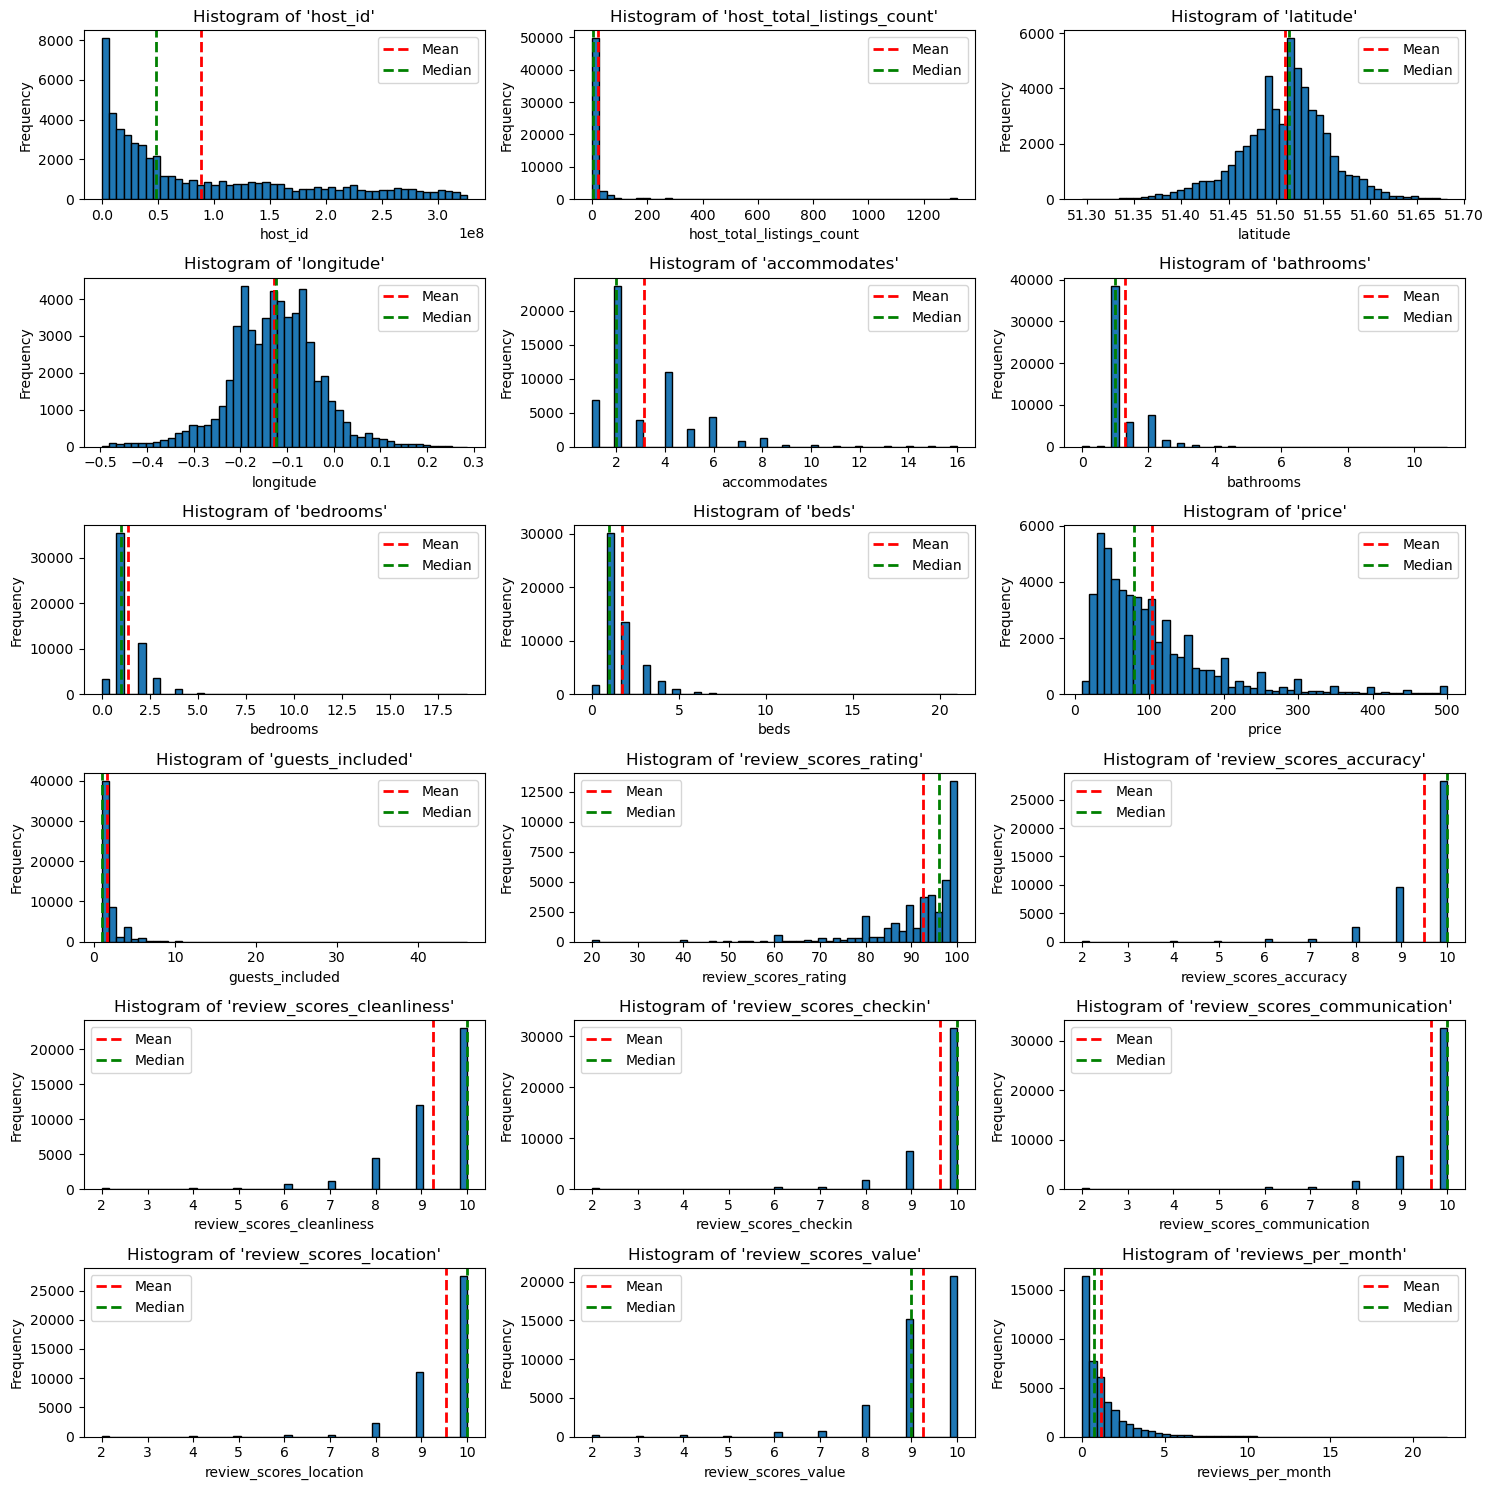

In [85]:
#Create histograms showing distributions of numerical variables
def plot_histograms(df):
          
        # Calculate the number of rows and columns for subplots
        num_cols = 3
        num_rows = (len(numerical_columns.columns) + num_cols - 1) // num_cols

        # Create subplots with smaller histograms
        fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))
        for i, column in enumerate(numerical_columns.columns):
            row_idx = i // num_cols
            col_idx = i % num_cols
            axes[row_idx, col_idx].hist(df[column].dropna(), bins=50, edgecolor='k')
            axes[row_idx, col_idx].set_title(f"Histogram of '{column}'")
            axes[row_idx, col_idx].set_xlabel(column)
            axes[row_idx, col_idx].set_ylabel("Frequency")

            # Calculate mean and median
            mean_val = df[column].mean()
            median_val = df[column].median()

            # Add mean and median lines
            axes[row_idx, col_idx].axvline(mean_val, color='r', linestyle='dashed', linewidth=2, label='Mean')
            axes[row_idx, col_idx].axvline(median_val, color='g', linestyle='dashed', linewidth=2, label='Median')

            # Add legend
            axes[row_idx, col_idx].legend()

        # Adjust layout to avoid overlapping titles and labels
        plt.tight_layout()
        plt.show()

plot_histograms(listings)


According to above graphs, we can see that target variable is highly skewed and some variables have inbalanced data. 
I'll take log of skewed price variable and remove unbalanaced data in the later step.

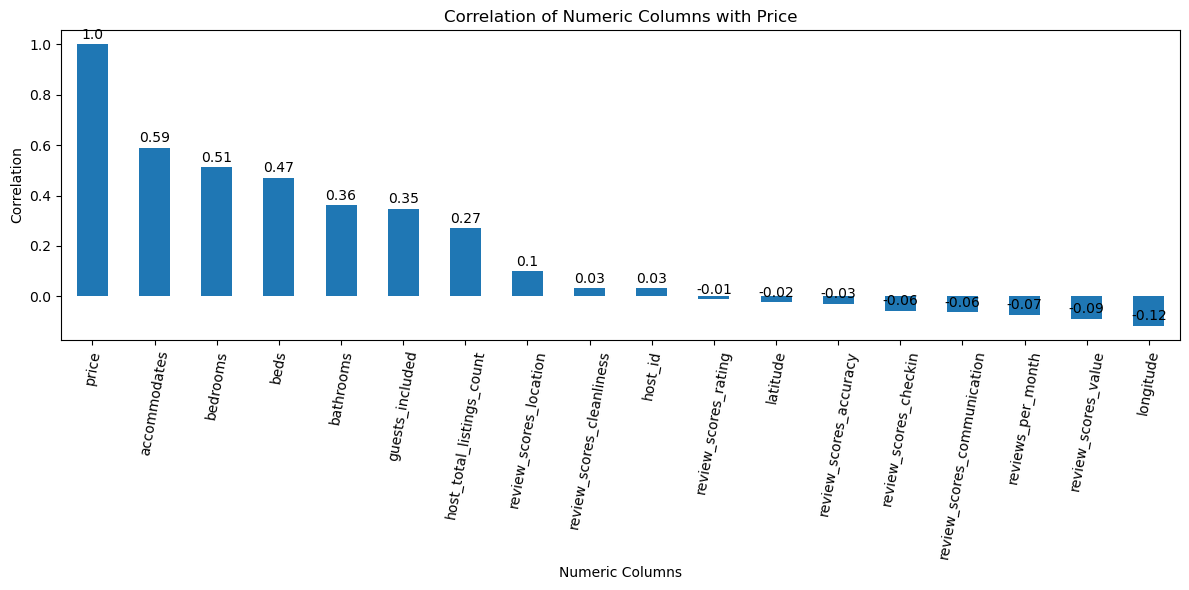

In [86]:
##Taking a look at the numeric columns correlation with the target variable.

# Calculate correlations
correlation_values = numerical_columns.corr()['price'].sort_values(ascending=False)

plt.figure(figsize=(12, 6))
correlation_values.plot(kind='bar', rot=80)

plt.title('Correlation of Numeric Columns with Price')
plt.xlabel('Numeric Columns')
plt.ylabel('Correlation')
plt.tight_layout()

# Add the correlation values on top of the bars
for idx, value in enumerate(correlation_values):
    plt.text(idx, value + 0.01, round(value, 2), ha='center', va='bottom')

plt.show()



All review score columns show week correlations with the price, so I'll drop them.

### **1.2 Text Variable Inspection**

In [88]:
# List of columns with text content
text_columns_list = ['name', 'summary', 'space', 'description', 'neighborhood_overview', 
                'transit', 'house_rules','picture_url']

text_columns = listings[text_columns_list]
text_columns.head()

,name,summary,space,description,neighborhood_overview,transit,house_rules,picture_url
0,Attic Room in historic Greenwich,The room does not have a door but its own disc...,Double room available in historic royal Greenw...,The room does not have a door but its own disc...,NaN,Parking is restricted in London. Visitors park...,no shoes on carpets no food in attic room no o...,https://a0.muscache.com/im/pictures/20045164/7...
1,Lovely Garden Studio Private Access,"Garden studio with private entrance, 5 minutes...","Beautiful studio with a king size bed, a sofa ...","Garden studio with private entrance, 5 minutes...",Crouch End is a very hip and friendly neighbou...,Walk across the street to the W3 bus stop and ...,We'd love it if you would remove your shoes at...,https://a0.muscache.com/im/pictures/8d1ddcdc-f...
2,Comfi apartment 2 close to wimbledon tennis court,NaN,NaN,NaN,NaN,NaN,1- No party or event allowed. 2-No smoking ins...,https://a0.muscache.com/im/pictures/e7e4a740-d...
3,Luxury room in the heart of London - SW4,Luxury first floor Victorian split level maiso...,"Your room will be fully furnished, and it will...",Luxury first floor Victorian split level maiso...,"Gail coffee shop, just round the corner as wel...",Happy to advise on things to do in London and ...,- Check-in after 18:30pm and no later than 20:...,https://a0.muscache.com/im/pictures/7c2b2fcc-e...
4,Excellent city Apartment with Private Patio,"NEW luxury apartment, with private outside pat...","A modern, well-equipped, cosy apartment close ...","NEW luxury apartment, with private outside pat...",NaN,NaN,"I am very happy for your visit, but please car...",https://a0.muscache.com/im/pictures/ca1494da-f...


In [89]:
show_object_type_and_missing_values(text_columns)

                      Data Type  # of Non-Null Values  # of Missing Values  Missing (%)  Unique Values
name                     object                 55270                   14         0.03          54042
summary                  object                 52330                 2954         5.34          49111
space                    object                 38403                16881        30.54          35719
description              object                 53558                 1726         3.12          51626
neighborhood_overview    object                 35778                19506        35.28          30233
transit                  object                 35477                19807        35.83          31098
house_rules              object                 31905                23379        42.29          24789
picture_url              object                 55284                    0         0.00          54423

Number of Columns: 8
Number of Rows: 55284


Neighbourhood_overview, space, transit and house_rules variables include high percentage of missing values that can affect the accuracy of prediction, so I'll drop them in the preprocessing part.
Summary is a shortest version of description, so I'll drop summary too.
For the text data I'll just use description and remove the rest in preprocessing.

### **1.3 Geographical Variable Inspection**

In [37]:
# List of columns with geographic content
geographical_columns_list = ['neighbourhood', 'neighbourhood_cleansed', 'zipcode', 'latitude', 'longitude',]

geographical_columns = listings[geographical_columns_list]
geographical_columns.head()

,neighbourhood,neighbourhood_cleansed,zipcode,latitude,longitude
0,Greenwich,Greenwich,SE10 8SX,51.47,-0.01
1,LB of Haringey,Haringey,N8 8NR,51.58,-0.12
2,LB of Merton,Merton,SW19 1DG,51.42,-0.19
3,Clapham,Lambeth,SW4 9EF,51.46,-0.14
4,LB of Lambeth,Lambeth,SE11 5TL,51.48,-0.11


In [133]:
show_object_type_and_missing_values(geographical_columns)

                       Data Type  # of Non-Null Values  # of Missing Values  Missing (%)  Unique Values
neighborhood_overview     object                 35778                19506        35.28          30233
neighbourhood             object                 55137                  147         0.27            149
neighbourhood_cleansed    object                 55284                    0         0.00             33
zipcode                   object                 54012                 1272         2.30          26556
latitude                 float64                 55284                    0         0.00          18292
longitude                float64                 55284                    0         0.00          26963

Number of Columns: 6
Number of Rows: 55284


In [40]:

Long=-0.13
Lat=51.5

locations = list(zip(geographical_columns.latitude, geographical_columns.longitude))

map1 = folium.Map(location=[Lat,Long], zoom_start=9)

FastMarkerCluster(data=locations).add_to(map1)

map1

In [41]:
show_object_type_and_missing_values(geographical_columns)

                       Data Type  # of Non-Null Values  # of Missing Values  Missing (%)  Unique Values
neighbourhood             object                 55137                  147         0.27            149
neighbourhood_cleansed    object                 55284                    0         0.00             33
zipcode                   object                 54012                 1272         2.30          26556
latitude                 float64                 55284                    0         0.00          18292
longitude                float64                 55284                    0         0.00          26963

Number of Columns: 5
Number of Rows: 55284


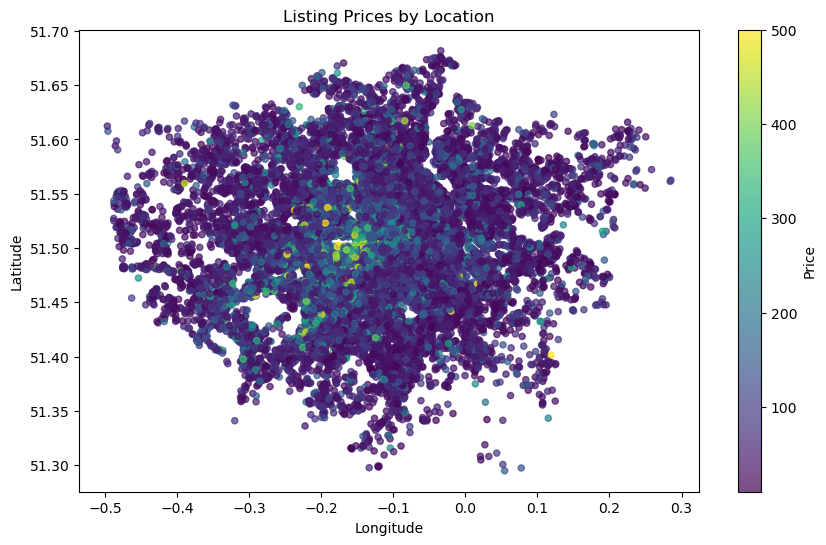

In [90]:
import matplotlib.pyplot as plt

# Assuming 'listings' is your DataFrame
plt.figure(figsize=(10, 6))

plt.scatter(listings.longitude, listings.latitude, c=listings.price, cmap='viridis', s=20, alpha=0.7)
plt.colorbar(label='Price')

plt.title('Listing Prices by Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()


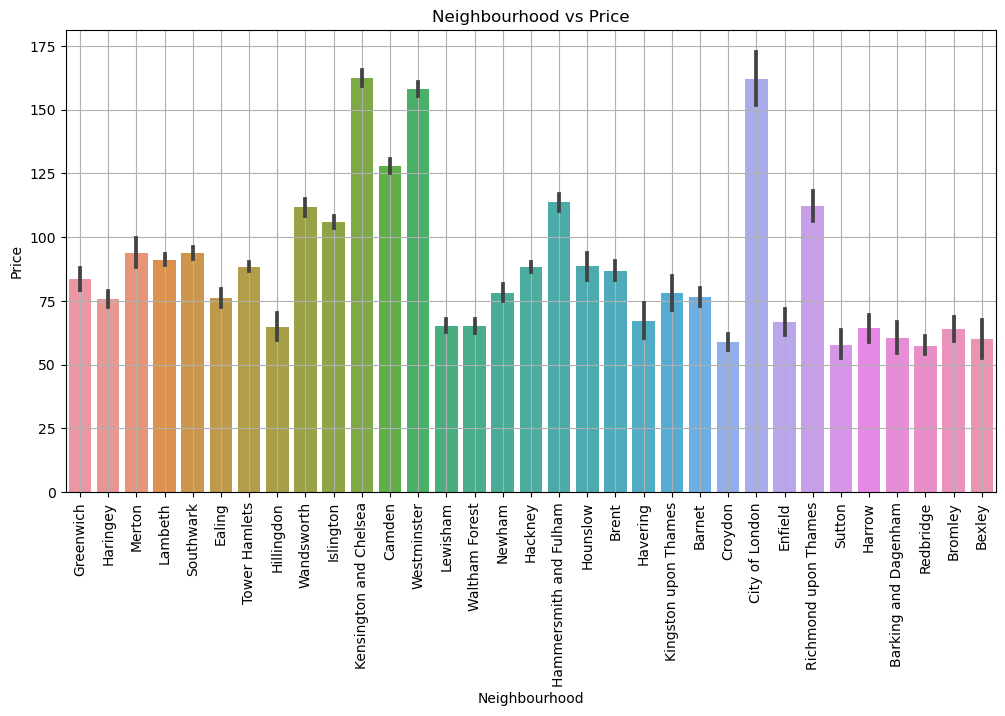

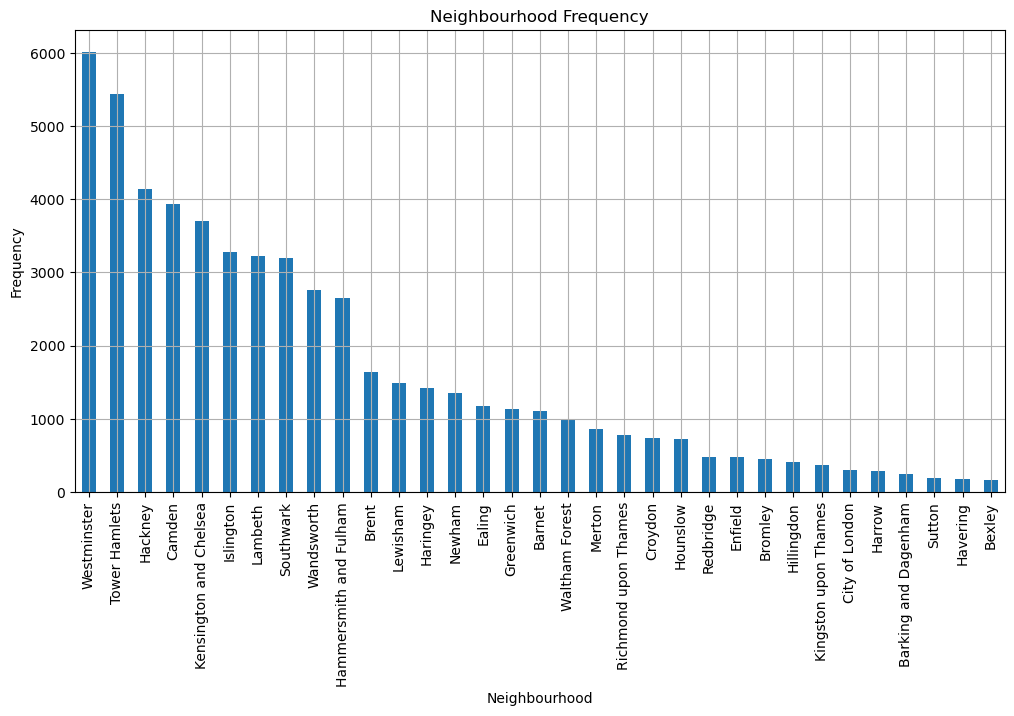

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'listings' is your DataFrame with columns 'price' and 'neighborhood_cleansed'

# Create a grouped bar chart for neighborhood vs price
plt.figure(figsize=(12, 6))
sns.barplot(x='neighbourhood_cleansed', y='price', data=listings)
plt.xlabel('Neighbourhood')
plt.ylabel('Price')
plt.title('Neighbourhood vs Price')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

# Create a bar chart for neighborhood frequency
plt.figure(figsize=(12, 6))
neighborhood_frequency = listings['neighbourhood_cleansed'].value_counts().sort_values(ascending=False)
neighborhood_frequency.plot(kind='bar')
plt.xlabel('Neighbourhood')
plt.ylabel('Frequency')
plt.title('Neighbourhood Frequency')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


First of all neighbourhood_cleansed is best grouped variable among categorical variables, so I'll drop zip and neighbourhood in the preprocessing.

Secondly, Westminster, Hackney, Camden, Kingston and Chealse are both close to city center, have high frequency and show high prices. This could be a strong indicatior for prediction. So, later I'll use longitude, latitude and neighbourhood_cleansed data to find distences from city center. Until then I'll keep those.

In [44]:
show_object_type_and_missing_values(listings)


                            Data Type  # of Non-Null Values  # of Missing Values  Missing (%)  Unique Values
name                           object                 55270                   14         0.03          54042
summary                        object                 52330                 2954         5.34          49111
space                          object                 38403                16881        30.54          35719
description                    object                 53558                 1726         3.12          51626
experiences_offered            object                 55284                    0         0.00              5
neighborhood_overview          object                 35778                19506        35.28          30233
transit                        object                 35477                19807        35.83          31098
house_rules                    object                 31905                23379        42.29          24789
picture_url        

### **1.4 Categorical Variable Inspection**

In [91]:

numerical_columns = listings.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Drop text columns to obtain numerical columns
numerical_df = listings.drop(columns=text_columns_list)

# Drop numerical columns to obtain categorical columns
categorical_columns = numerical_df.drop(columns=numerical_columns)

# Display the first few rows of the categorical columns DataFrame
categorical_columns.head()

,experiences_offered,host_since,host_response_time,host_response_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,zipcode,property_type,room_type,bed_type,amenities,cancellation_policy,listing_id
0,business,2012-04-18,within an hour,100%,t,t,f,Greenwich,Greenwich,SE10 8SX,Townhouse,Private room,Pull-out Sofa,"{Wifi,""Paid parking off premises"",Heating,Wash...",strict_14_with_grace_period,9Q1RD6H7IO
1,none,2014-05-29,within a few hours,100%,t,t,t,LB of Haringey,Haringey,N8 8NR,Guesthouse,Private room,Real Bed,"{TV,Wifi,""Free parking on premises"",Breakfast,...",moderate,6XDPZPGLSR
2,none,2019-06-28,within an hour,100%,f,t,f,LB of Merton,Merton,SW19 1DG,Apartment,Entire home/apt,Real Bed,"{Wifi,Kitchen,""Paid parking off premises"",Heat...",strict_14_with_grace_period,SND9OPN6IY
3,none,2012-08-24,within a few hours,100%,f,t,f,Clapham,Lambeth,SW4 9EF,Apartment,Private room,Real Bed,"{TV,Wifi,Kitchen,Heating,Washer,""Smoke detecto...",flexible,SE3B7BXN9G
4,none,2016-09-09,within an hour,100%,t,t,f,LB of Lambeth,Lambeth,SE11 5TL,Apartment,Entire home/apt,Real Bed,"{TV,Wifi,Kitchen,""Paid parking off premises"",H...",strict_14_with_grace_period,E0C82VK0VF


In [86]:
categorical_columns.nunique()

experiences_offered           5
host_since                 3446
host_response_time            4
host_response_rate           69
host_is_superhost             2
host_has_profile_pic          2
host_identity_verified        2
neighbourhood               149
neighbourhood_cleansed       33
zipcode                   26556
property_type                38
room_type                     4
bed_type                      5
amenities                 50376
cancellation_policy           8
listing_id                55284
dtype: int64

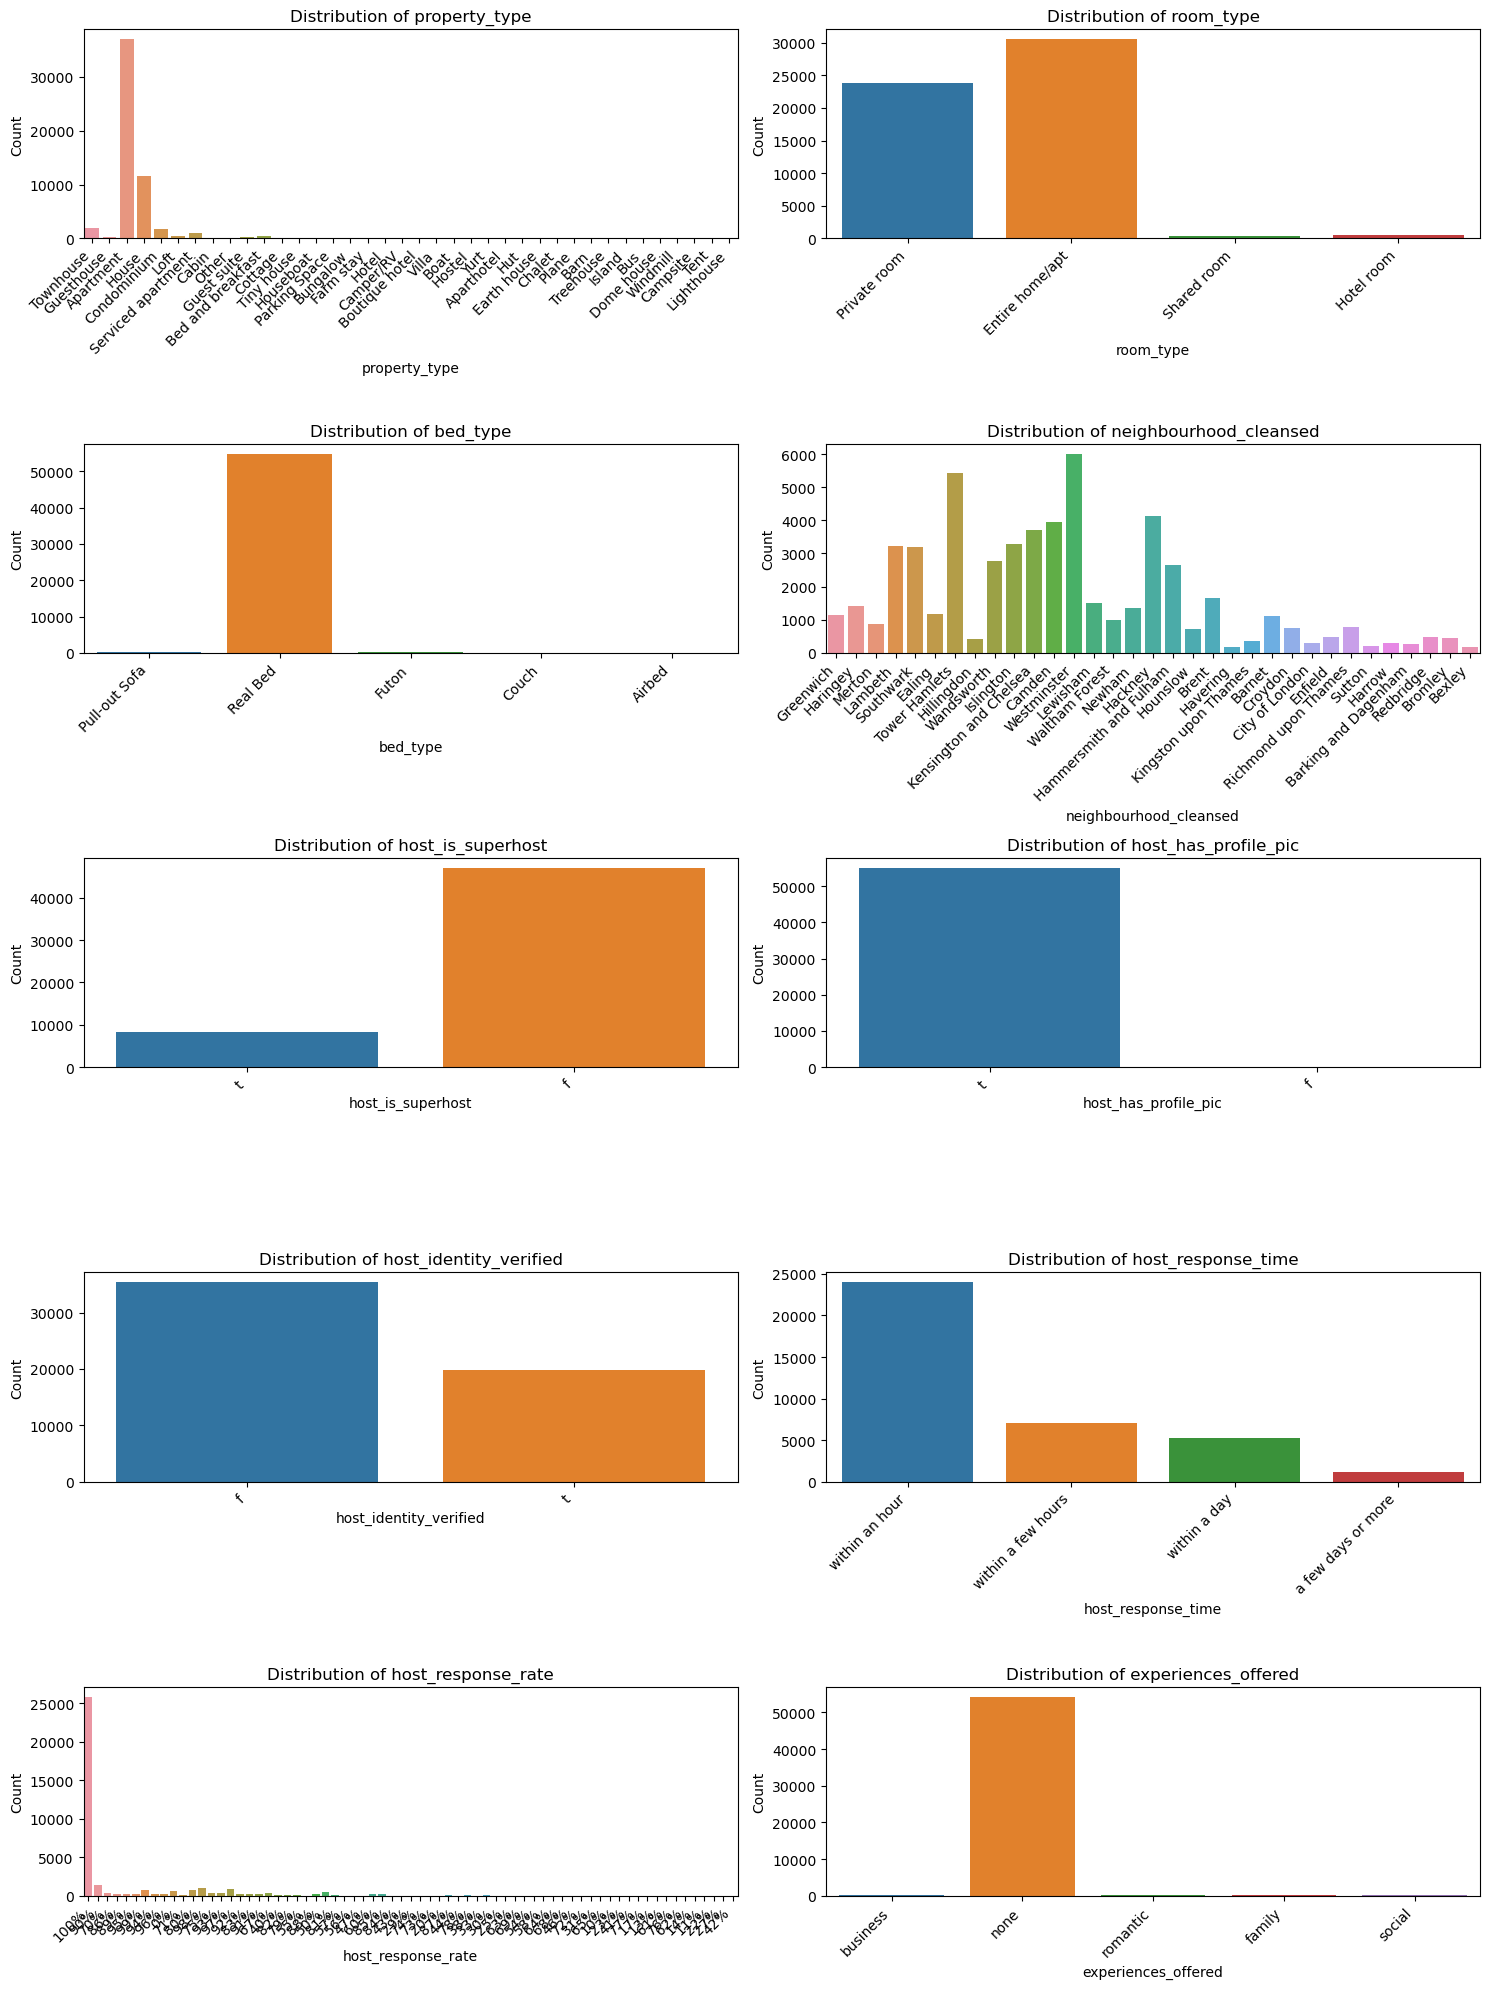

In [48]:


# Assuming 'listings' is your DataFrame
columns_to_plot = ['property_type', 'room_type', 'bed_type', 'neighbourhood_cleansed',
                   'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified',
                   'host_response_time', 'host_response_rate', 'experiences_offered']

# Set up the layout of subplots
num_rows = 5
num_cols = 2
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 20))
plt.subplots_adjust(wspace=0.4, hspace=0.5)

# Iterate through the columns and create bar plots
for i, column in enumerate(columns_to_plot):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]

    sns.countplot(data=listings, x=column, ax=ax)
    ax.set_title(f'Distribution of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Count')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Display the subplots
plt.tight_layout()
plt.show()


Host_has_profile_pic, experiences_offered, host_response_rate and bed type have no variety. In other words these won't help for prediction. So I'll drop them in preprocessing.
For room, I can combine private room and hotel room. Because hotel room can be counted as private.
For property type, I can combine all types as others apart from Apartment and Others.

## **1. Data Preprocessing** 

#### **Initial columns to drop decided in data exploration phase**

In [134]:
def drop_specific_columns(df):
    """
    Drop unwanted columns decided in data inspection part from a DataFrame.

    Parameters:
        df (pd.DataFrame): The input DataFrame.

    Returns:
        pd.DataFrame: DataFrame with specific columns dropped.
    """
    columns_to_drop = [
        'host_total_listings_count', 'review_scores_rating', 'review_scores_accuracy',
        'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication',
        'review_scores_location', 'review_scores_value', 'reviews_per_month',
        'neighbourhood', 'zipcode',
        'name', 'summary', 'space', 'neighborhood_overview', 'transit', 'house_rules',
        'host_has_profile_pic', 'experiences_offered', 'host_response_rate', 'bed_type', 'picture_url','host_id',
        'host_since', 'host_response_time'
    ]
    df = df.drop(columns=columns_to_drop, errors='ignore')
    return df


In [135]:
listings = drop_specific_columns(listings)

In [136]:
show_object_type_and_missing_values(listings)

                       Data Type  # of Non-Null Values  # of Missing Values  Missing (%)  Unique Values
description               object                 53558                 1726         3.12          51626
host_is_superhost         object                 55173                  111         0.20              2
host_identity_verified    object                 55173                  111         0.20              2
neighbourhood_cleansed    object                 55284                    0         0.00             33
latitude                 float64                 55284                    0         0.00          18292
longitude                float64                 55284                    0         0.00          26963
property_type             object                 55284                    0         0.00             38
room_type                 object                 55284                    0         0.00              4
accommodates               int64                 55284          

#### **Removing outliers**

In [137]:
def remove_outliers(df, column_name):
    """
    Remove outliers from a DataFrame based on the IQR method.

    Parameters:
        df (pd.DataFrame): The input DataFrame.
        column_name (str): Name of the column to remove outliers from.

    Returns:
        pd.DataFrame: DataFrame with outliers removed from the specified column.
    """
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    filtered_data = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
    return filtered_data


In [138]:
listings = remove_outliers(listings, 'price')

In [28]:
show_object_type_and_missing_values(listings)

                       Data Type  # of Non-Null Values  # of Missing Values  Missing (%)  Unique Values
description               object                 33672                    0         0.00          32041
host_response_time        object                 33672                    0         0.00              4
host_is_superhost          int64                 33672                    0         0.00              2
host_identity_verified    object                 33672                    0         0.00              2
neighbourhood_cleansed    object                 33672                    0         0.00             33
latitude                 float64                 33672                    0         0.00          14743
longitude                float64                 33672                    0         0.00          20646
property_type             object                 33672                    0         0.00              3
room_type                 object                 33672          

#### **Eleminating Duplicated Row**

In [139]:
# Check for duplicated rows
duplicated_rows = listings[listings.duplicated(keep=False)]

# Check if there are duplicates and print the number of duplicated cases
if not duplicated_rows.empty:
    num_duplicated_cases = duplicated_rows.shape[0]
    print(f"Number of duplicated cases: {num_duplicated_cases}")
else:
    print("No duplicated rows found.")

No duplicated rows found.


#### **Handling Missing Values**

Filling numerical columns' null values with the appropriate values for each one

In [140]:
listings['bathrooms'].fillna(listings['bathrooms'].median(), inplace=True)
listings['bedrooms'].fillna(listings['bedrooms'].median(), inplace=True)
listings['beds'].fillna(listings['beds'].median(), inplace=True)

listings = listings.dropna(subset=['description'])

## **1. Data Transformation** 

**Encoding Binary Values**

In [141]:

# Replace 't' with 1 and 'f' with 0 in the 'host_is_superhost' column
listings['host_is_superhost'] = listings['host_is_superhost'].map({'t': 1, 'f': 0})
listings['host_identity_verified'] = listings['host_identity_verified'].map({'t': 1, 'f': 0})

'property_type' attribute generalized and classified in 3 most frequent type
The majority of the properties are types 'Apartment' and 'House'. We are keeping those types and classify the rest of the properies as 'Other'.

**Data Grouping for Property Type and Room Type Column**

In [142]:
listings['property_type'].value_counts()

property_type
Apartment             34192
House                 10307
Townhouse              1716
Condominium            1520
Serviced apartment      776
Loft                    461
Bed and breakfast       342
Guest suite             232
Guesthouse              207
Other                   140
Boutique hotel          116
Hostel                   91
Bungalow                 87
Hotel                    84
Cottage                  57
Boat                     44
Tiny house               31
Aparthotel               30
Houseboat                20
Villa                    18
Cabin                    13
Earth house              12
Hut                       9
Camper/RV                 9
Yurt                      4
Barn                      4
Farm stay                 3
Chalet                    3
Treehouse                 3
Dome house                3
Tent                      3
Bus                       2
Parking Space             1
Island                    1
Campsite                  1
Lighth

In [143]:

#Replace the types that are not Apartment or House to 'Other'
listings['property_type'] = listings['property_type'].replace(['Windmill','Townhouse', 'Condominium', 'Serviced apartment' , 'Loft','Bed and breakfast', 'Guest suite', 'Guesthouse', 'Boutique hotel', 'Hostel', 'Hotel', 'Bungalow', 'Cottage', 'Aparthotel', 'Boat', 'Villa', 'Tiny house', 'Houseboat', 'Cabin', 'Camper/RV', 'Chalet', 'Earth house', 'Hut', 'Barn', 'Casa particular (Cuba)', 'Yurt', 'Farm stay', 'Treehouse', 'Dome house', 'Island', 'Tent', 'Lighthouse', 'Campsite', 'Plane', 'Minsu (Taiwan)', 'Bus', 'Parking Space', 'Nature lodge', "Shepherd's hut (U.K., France)", 'Ryokan (Japan)', 'Dorm'], 'Other')

#Check
listings['property_type'].value_counts()

property_type
Apartment    34192
House        10307
Other         6044
Name: count, dtype: int64

Reduce the 'room_type' attribute types to 3

In [123]:
listings['room_type'].value_counts()

room_type
Entire home/apt    18772
Private room       14204
Hotel room           460
Shared room          236
Name: count, dtype: int64

In [144]:
listings['room_type'] = listings['room_type'].str.replace('Hotel room', 'Private room')

listings['room_type'].value_counts()


room_type
Entire home/apt    27002
Private room       23151
Shared room          390
Name: count, dtype: int64

**Transformation of Oridnal Values**

In [50]:
listings['cancellation_policy'].unique()

array(['strict_14_with_grace_period', 'moderate', 'flexible',
       'super_strict_60', 'super_strict_30', 'strict'], dtype=object)

In [145]:
from sklearn.preprocessing import OrdinalEncoder

def encode_cancellation_policies(dataframe):
    ordinal_order = {
        'flexible': 1,
        'moderate': 2,
        'strict_14_with_grace_period': 3,
        'strict': 6,
        'super_strict_30': 5,
        'super_strict_60': 4
    }

    encoded_data = [[ordinal_order[policy]] for policy in dataframe['cancellation_policy']]
    
    encoder = OrdinalEncoder()
    encoded_labels = encoder.fit_transform(encoded_data)
    
    dataframe['cancellation_policy_encoded'] = encoded_labels.flatten()
    
    return dataframe


In [146]:
listings = encode_cancellation_policies(listings)
listings.drop('cancellation_policy', axis=1, inplace=True)

**Sentiment Scores of Description**

In [147]:

# Download the vader_lexicon resource
nltk.download('vader_lexicon')

# Assuming listings is your DataFrame

# Adding the new columns
listings["Description_Length"] = np.nan
listings["Sentiment_intensity"] = np.nan

sent_int = SentimentIntensityAnalyzer()

for index, row in listings.iterrows():
    s = row['description']
    
    # Handle missing or NaN values
    if isinstance(s, str):
        # generating sentiment intensity score for descriptions
        sentiment = sent_int.polarity_scores(s)
        listings.at[index, "Sentiment_intensity"] = sentiment["compound"]
        
        # Finding the length of the description
        listings.at[index, "Description_Length"] = len(s.split())


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [148]:
listings.drop('description', axis=1, inplace=True)

In [149]:
show_object_type_and_missing_values(listings)

                            Data Type  # of Non-Null Values  # of Missing Values  Missing (%)  Unique Values
host_is_superhost             float64                 50447                   96         0.19              2
host_identity_verified        float64                 50447                   96         0.19              2
neighbourhood_cleansed         object                 50543                    0         0.00             33
latitude                      float64                 50543                    0         0.00          17838
longitude                     float64                 50543                    0         0.00          25906
property_type                  object                 50543                    0         0.00              3
room_type                      object                 50543                    0         0.00              3
accommodates                    int64                 50543                    0         0.00             16
bathrooms          

-------------------------------------------------------------------------------------------------------

#### **Encoding Amenities**

In [150]:

def one_hot_encode_amenities(df, top_n=20):
    '''
    INPUT: 
    df - Original dataframe
    top_n - Number of most frequent amenities to include
    OUTPUT: 
    df_amenities - One-hot encoded dataframe of top_n amenities
    
    Create dummies from list of amenities
    
    '''

    def clean_amenities(row):
        '''
        Remove special characters and split the strings
        '''
        row = re.sub('[^A-Za-z,]+', '_', row).split(",")
        return row
    
    df['amenities'] = df['amenities'].apply(clean_amenities)
    
    # Create columns from list of amenities
    df_amenities = df.amenities.str.join('|').str.get_dummies().add_prefix('amenity')
    
    # Calculate the frequency of each amenity
    amenity_frequencies = df_amenities.sum().sort_values(ascending=False)
    
    # Select the top_n most frequent amenities
    top_amenities = amenity_frequencies.head(top_n).index
    
    # Include only the top_n most frequent amenities
    df_amenities = df_amenities[top_amenities]
    
    return df_amenities

amenities_df = one_hot_encode_amenities(listings, top_n=20)




In [151]:
#Concatenate dataframes
listings = pd.concat([listings, amenities_df], axis=1)

In [152]:
listings.drop(columns = 'amenities', inplace =True)

#### **Encoding Other Categorical Variables**

In [153]:

# 'columns_to_encode' is a list containing the names of columns you want to one-hot encode
columns_to_encode = ['room_type', 'property_type']  # Replace with the actual column names

# Create one-hot encoded columns for specific columns in the 'listings' DataFrame
listings = pd.get_dummies(listings, columns=columns_to_encode, dtype=int)


#### **Transformation Geographical Columns**

In [154]:

# Function to calculate distance to city center
def calculate_distance(row):
    return geodesic((row['latitude'], row['longitude']), (city_center_latitude, city_center_longitude)).kilometers

# Assuming 'listings' is your DataFrame containing neighborhood data
# and 'neighbourhood_cleansed', 'latitude', and 'longitude' are column names
city_center_latitude = 51.5074  # City center's latitude for London
city_center_longitude = -0.1278  # City center's longitude for London

# Calculate mean longitude and latitude for each neighbourhood_cleansed
mean_locations = listings.groupby('neighbourhood_cleansed').agg({
    'latitude': 'mean',
    'longitude': 'mean'
}).reset_index()

# Calculate distances to city center for mean locations
mean_locations['distance_to_center'] = mean_locations.apply(calculate_distance, axis=1)

# Merge the mean distances back into the 'listings' DataFrame
listings = pd.merge(listings, mean_locations[['neighbourhood_cleansed', 'distance_to_center']], on='neighbourhood_cleansed', how='left')


In [155]:
listings = listings.drop(columns=['neighbourhood_cleansed', 'latitude', 'longitude'])

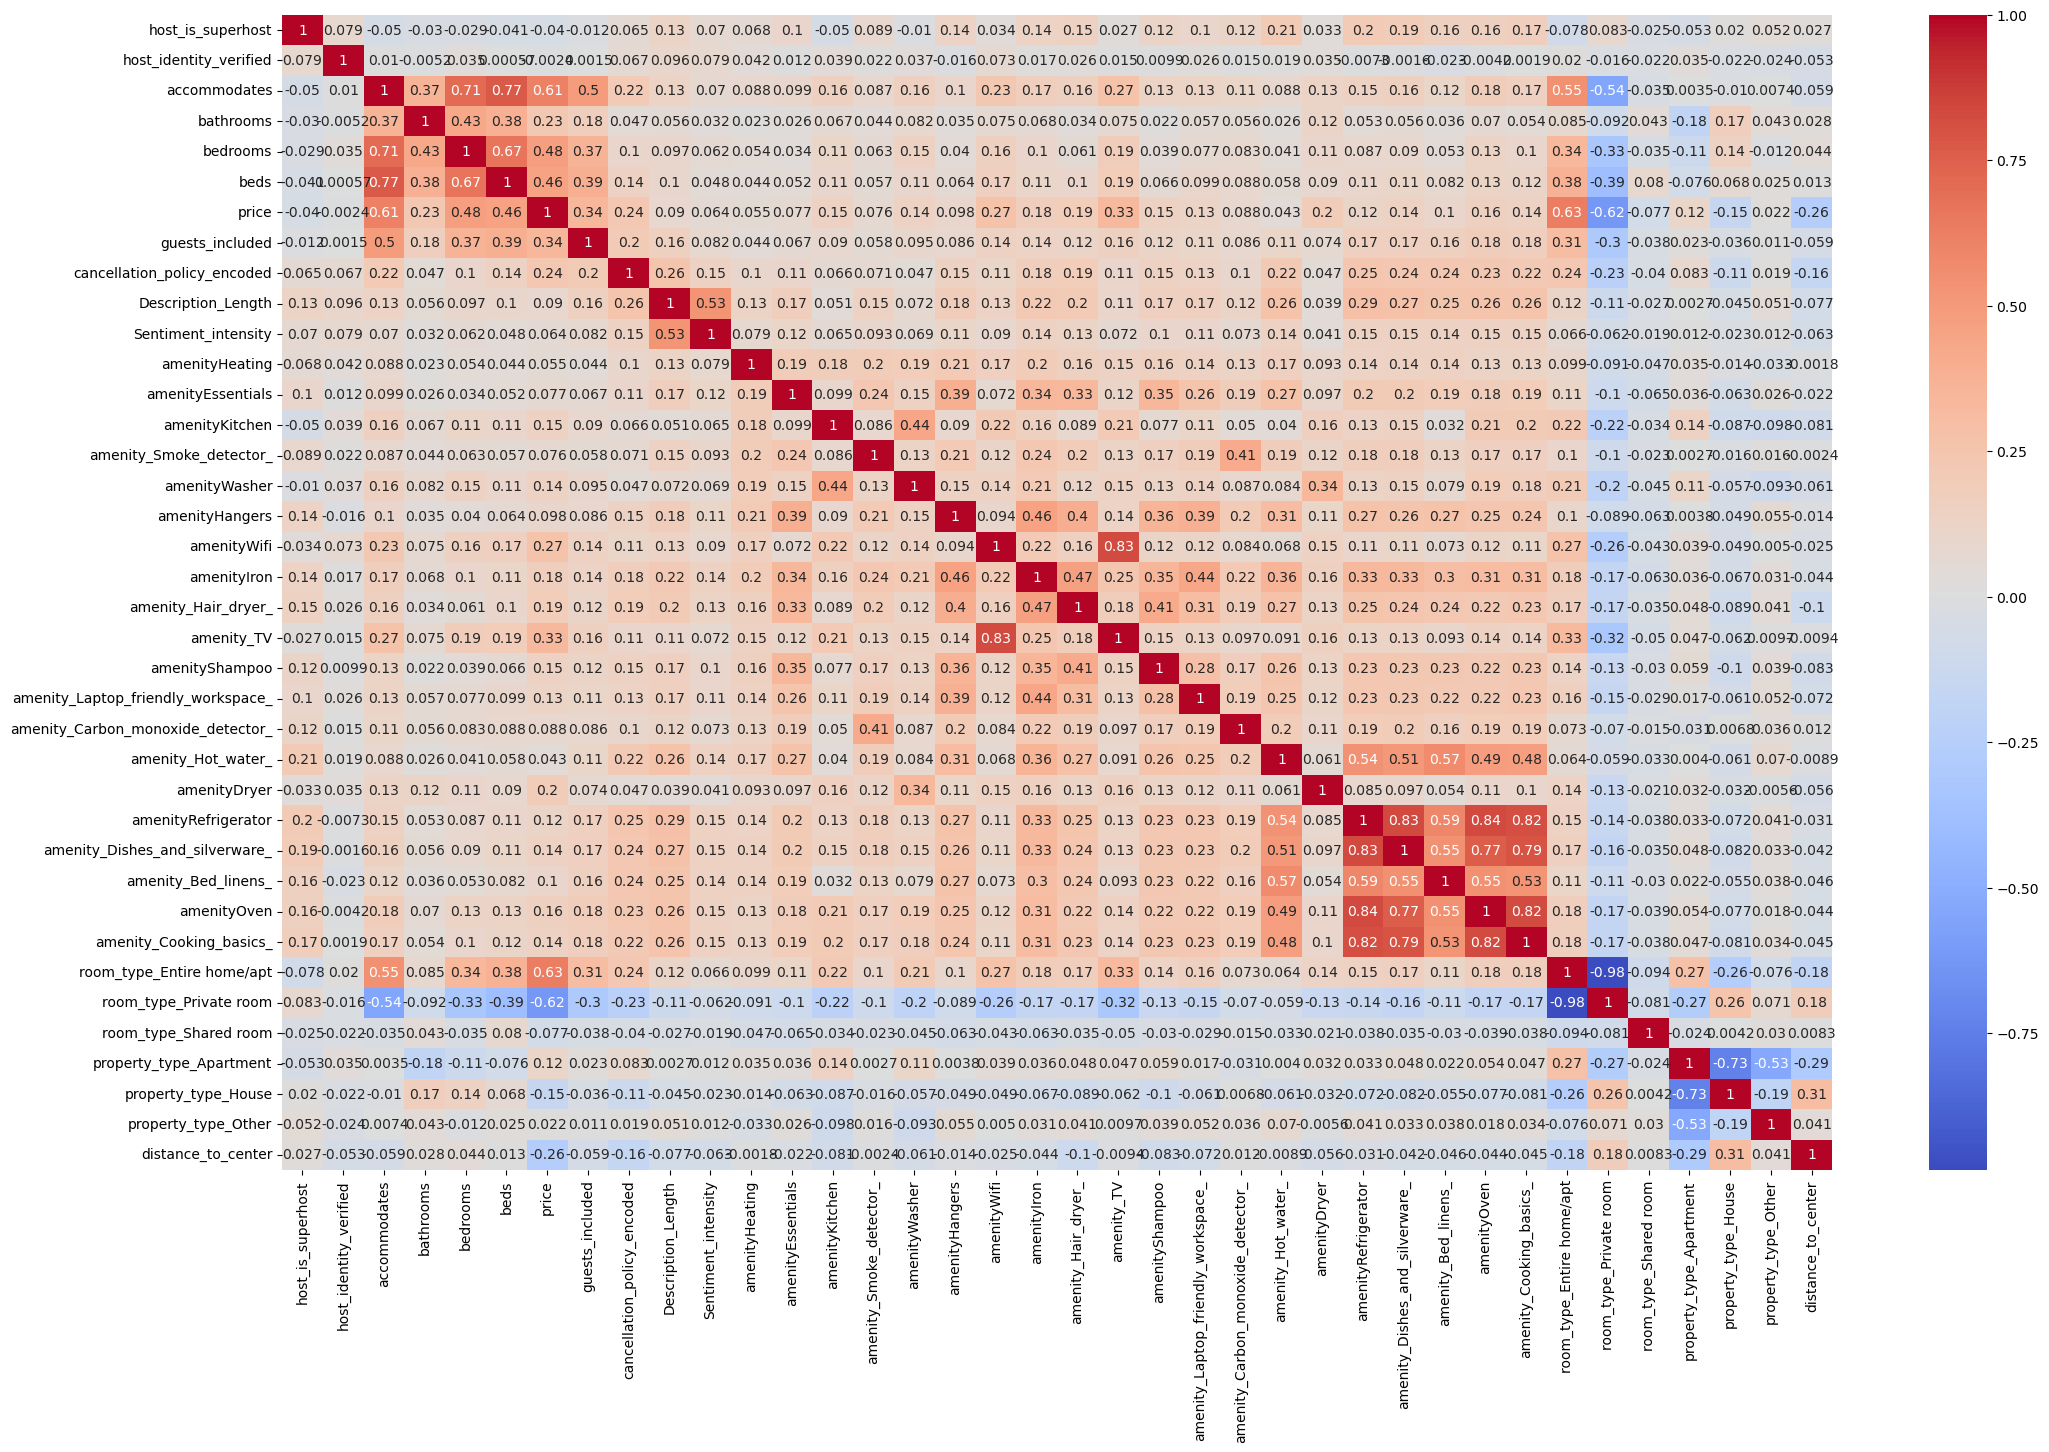

In [156]:


# Select only numeric columns for the correlation matrix
numeric_columns = listings.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr = numeric_columns.corr()

plt.figure(figsize=(25, 15))

# Plot the heatmap
sns.heatmap(corr,
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            annot=True,  # Display correlation values on the heatmap
            cmap='coolwarm')

plt.show()

In [157]:
show_object_type_and_missing_values(listings)
listings.head()

                                   Data Type  # of Non-Null Values  # of Missing Values  Missing (%)  Unique Values
host_is_superhost                    float64                 50447                   96         0.19              2
host_identity_verified               float64                 50447                   96         0.19              2
accommodates                           int64                 50543                    0         0.00             16
bathrooms                            float64                 50543                    0         0.00             18
bedrooms                             float64                 50543                    0         0.00             11
beds                                 float64                 50543                    0         0.00             19
price                                float64                 50543                    0         0.00            247
guests_included                        int64                 50543      

,host_is_superhost,host_identity_verified,accommodates,bathrooms,bedrooms,beds,price,guests_included,listing_id,cancellation_policy_encoded,Description_Length,Sentiment_intensity,amenityHeating,amenityEssentials,amenityKitchen,amenity_Smoke_detector_,amenityWasher,amenityHangers,amenityWifi,amenityIron,amenity_Hair_dryer_,amenity_TV,amenityShampoo,amenity_Laptop_friendly_workspace_,amenity_Carbon_monoxide_detector_,amenity_Hot_water_,amenityDryer,amenityRefrigerator,amenity_Dishes_and_silverware_,amenity_Bed_linens_,amenityOven,amenity_Cooking_basics_,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,property_type_Apartment,property_type_House,property_type_Other,distance_to_center
0,1.00,0.00,2,1.00,1.00,1.00,35.00,1,9Q1RD6H7IO,2.00,176.00,0.97,1,1,0,1,1,1,0,1,1,0,1,1,1,1,0,0,1,1,0,0,0,1,0,0,0,1,12.09
1,1.00,1.00,2,1.00,1.00,1.00,75.00,2,6XDPZPGLSR,1.00,168.00,0.99,1,1,0,0,0,1,1,1,1,1,1,1,0,1,0,1,1,0,0,0,0,1,0,0,0,1,9.01
2,0.00,0.00,1,1.00,1.00,1.00,50.00,1,SE3B7BXN9G,0.00,176.00,0.94,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,1,0,0,0,1,0,1,0,0,4.86
3,1.00,0.00,3,1.00,2.00,2.00,104.00,1,E0C82VK0VF,2.00,144.00,0.98,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0,1,1,1,0,0,1,0,0,4.86
4,0.00,0.00,6,1.00,2.00,3.00,100.00,1,3OP12CBRJ5,0.00,177.00,0.96,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,4.15


## **Same Preprocessing and Transformation Steps for Test Data**

#### **Initial columns to drop decided in data exploration phase**

In [158]:
listings_test = pd.read_csv('test.csv')
listings_test.shape

(29769, 41)

In [159]:
listings_test = drop_specific_columns(listings_test)

In [161]:
listings_test.shape

(29769, 16)

#### **Removing outliers**

In [ ]:
#listings_test = remove_outliers(listings_test, 'price')

#### **Handling Missing Values**

In [113]:
listings_test['bathrooms'].fillna(listings_test['bathrooms'].median(), inplace=True)
listings_test['bedrooms'].fillna(listings_test['bedrooms'].median(), inplace=True)
listings_test['beds'].fillna(listings_test['beds'].median(), inplace=True)

#listings_test = listings_test.dropna(subset=['host_response_time'])


#listings_test = listings_test.dropna(subset=['description'])

**Encoding Binary Values**

In [114]:

# Replace 't' with 1 and 'f' with 0 in the 'host_is_superhost' column
listings['host_is_superhost'] = listings['host_is_superhost'].map({'t': 1, 'f': 0})
listings['host_identity_verified'] = listings['host_identity_verified'].map({'t': 1, 'f': 0})

**Data Grouping for Property Type and Room Type Column**

In [115]:

#Replace the types that are not Apartment or House to 'Other'
listings_test['property_type'] = listings_test['property_type'].replace(['Windmill','Townhouse', 'Condominium', 'Serviced apartment' , 'Loft','Bed and breakfast', 'Guest suite', 'Guesthouse', 'Boutique hotel', 'Hostel', 'Hotel', 'Bungalow', 'Cottage', 'Aparthotel', 'Boat', 'Villa', 'Tiny house', 'Houseboat', 'Cabin', 'Camper/RV', 'Chalet', 'Earth house', 'Hut', 'Barn', 'Casa particular (Cuba)', 'Yurt', 'Farm stay', 'Treehouse', 'Dome house', 'Island', 'Tent', 'Lighthouse', 'Campsite', 'Plane', 'Minsu (Taiwan)', 'Bus', 'Parking Space', 'Nature lodge', "Shepherd's hut (U.K., France)", 'Ryokan (Japan)', 'Dorm'], 'Other')

#Check
listings_test['property_type'].value_counts()

property_type
Apartment    20000
House         6227
Other         3542
Name: count, dtype: int64

In [116]:
listings_test['room_type'] = listings_test['room_type'].str.replace('Hotel room', 'Private room')

listings_test['room_type'].value_counts()


room_type
Entire home/apt    16525
Private room       13022
Shared room          222
Name: count, dtype: int64

In [117]:
import nltk
import numpy as np
from nltk.sentiment import SentimentIntensityAnalyzer

def add_sentiment_and_length_columns(dataset, text_column):
    # Download the vader_lexicon resource
    nltk.download('vader_lexicon')

    # Create a copy of the dataset to avoid modifying the original
    dataset_copy = dataset.copy()

    # Adding the new columns
    dataset_copy["Description_Length"] = np.nan
    dataset_copy["Sentiment_intensity"] = np.nan

    sent_int = SentimentIntensityAnalyzer()

    for index, row in dataset_copy.iterrows():
        s = row[text_column]

        # Handle missing or NaN values
        if isinstance(s, str):
            # generating sentiment intensity score for descriptions
            sentiment = sent_int.polarity_scores(s)
            dataset_copy.at[index, "Sentiment_intensity"] = sentiment["compound"]

            # Finding the length of the description
            dataset_copy.at[index, "Description_Length"] = len(s.split())
    
    return dataset_copy

# Usage example
listings_test = add_sentiment_and_length_columns(listings_test, "description")


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [118]:
listings_test.drop('description', axis=1, inplace=True)

In [132]:
show_object_type_and_missing_values(listings_test)

                                   Data Type  # of Non-Null Values  # of Missing Values  Missing (%)  Unique Values
host_response_time                    object                 20197                 9572        32.15              4
host_is_superhost                     object                 29769                    0         0.00              2
host_identity_verified                object                 29769                    0         0.00              2
neighbourhood_cleansed                object                 29769                    0         0.00             33
latitude                             float64                 29769                    0         0.00          14075
longitude                            float64                 29769                    0         0.00          19143
accommodates                           int64                 29769                    0         0.00             16
bathrooms                            float64                 29769      

#### **Encoding Amenities**

In [120]:
amenities_df = one_hot_encode_amenities(listings_test, top_n=20)

In [121]:
#Concatenate dataframes
listings_test = pd.concat([listings_test, amenities_df], axis=1)

In [122]:
listings_test.drop(columns = 'amenities', inplace =True)

#### **Encoding Other Categorical Variables**

In [123]:

# 'columns_to_encode' is a list containing the names of columns you want to one-hot encode
columns_to_encode = ['room_type', 'property_type',]  # Replace with the actual column names

# Create one-hot encoded columns for specific columns in the 'listings' DataFrame
listings_test = pd.get_dummies(listings_test, columns=columns_to_encode, dtype=int)

In [131]:
# Assuming host is superhost and host_identity_verified as well if its value is NaN.
listings_test['host_is_superhost']=listings_test['host_is_superhost'].fillna('t')
listings_test['host_identity_verified']=listings_test['host_identity_verified'].fillna('t')



In [126]:
listings_test = encode_cancellation_policies(listings_test)
listings_test.drop('cancellation_policy', axis=1, inplace=True)

In [127]:
listings_test = encode_host_response_time(listings_test)
listings_test.drop('host_response_time', axis=1, inplace=True)

KeyError: nan

#### **Transformation Geographical Columns**

In [164]:
# Function to calculate distance to city center
def calculate_distance(row):
    return geodesic((row['latitude'], row['longitude']), (city_center_latitude, city_center_longitude)).kilometers

# Assuming 'listings' is your DataFrame containing neighborhood data
# and 'neighbourhood_cleansed', 'latitude', and 'longitude' are column names
city_center_latitude = 51.5074  # City center's latitude for London
city_center_longitude = -0.1278  # City center's longitude for London

# Calculate mean longitude and latitude for each neighbourhood_cleansed
mean_locations = listings_test.groupby('neighbourhood_cleansed').agg({
    'latitude': 'mean',
    'longitude': 'mean'
}).reset_index()

# Calculate distances to city center for mean locations
mean_locations['distance_to_center'] = mean_locations.apply(calculate_distance, axis=1)

# Merge the mean distances back into the 'listings' DataFrame
listings_test = pd.merge(listings_test, mean_locations[['neighbourhood_cleansed', 'distance_to_center']], on='neighbourhood_cleansed', how='left')


In [165]:
listings_test = listings_test.drop(columns=['neighbourhood_cleansed', 'latitude', 'longitude'])

In [166]:
show_object_type_and_missing_values(listings_test)
show_object_type_and_missing_values(listings)


                                                Data Type  # of Non-Null Values  # of Missing Values  Missing (%)  Unique Values
host_is_superhost                                 float64                 29704                   65         0.22              2
accommodates                                        int64                 29769                    0         0.00             16
bathrooms                                         float64                 29769                    0         0.00             20
bedrooms                                          float64                 29769                    0         0.00             12
beds                                              float64                 29769                    0         0.00             16
guests_included                                     int64                 29769                    0         0.00             16
listing_id                                         object                 29769                  

In [168]:
# Assuming X_train, X_test, y_train, y_test are your data
# Drop the listing_id column from X_train and X_test
listings_without_id = listings.drop('listing_id', axis=1)
listings_test_without_id = listings_test.drop('listing_id', axis=1)

In [169]:
listings_test_without_id.shape


(29769, 47)

## **Modelling**

In [170]:
y_train = listings_without_id["price"].copy()
X_train_without_id= listings_without_id.drop("price", axis=1) # drop labels for training set
X_test= listings_test_without_id

In [99]:
#y_train = listings["price"].copy()
#X_train= listings.drop("price", axis=1) # drop labels for training set
#X_test= listings_test

In [175]:
y_test = pd.Series(50*np.ones(29769))
y_test.name="price"


# List of features for later use
X_test_columns = list(X_test.columns)

In [176]:
print(y_train.shape)
print(y_test.shape)
print(X_train_without_id.shape)
print(X_test.shape)

(33672,)
(29769,)
(33672, 47)
(29769, 47)


In [177]:
!pip install keras
!pip install tensorflow

import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# Assuming X_train, X_test, y_train, y_test are your data
# Convert y_train and y_test to numpy arrays
y_train = np.array(y_train)
y_test = np.array(y_test)

# Create a sequential model
model = Sequential()

# Add input layer and hidden layers
model.add(Dense(units=64, activation='relu', input_shape=(X_train_without_id.shape[1],)))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=16, activation='relu'))

# Add output layer
model.add(Dense(units=1, activation='linear'))  # Assuming regression task

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
model.fit(X_train_without_id, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on test data
loss = model.evaluate(X_test, y_test)

print(f"Test loss: {loss}")


Epoch 1/100
1053/1053 [==============================] - 2s 2ms/step - loss: 1901.5773 - val_loss: nan
Epoch 2/100
1053/1053 [==============================] - 2s 1ms/step - loss: 1378.0155 - val_loss: nan
Epoch 3/100
1053/1053 [==============================] - 2s 1ms/step - loss: 1345.4229 - val_loss: nan
Epoch 4/100
1053/1053 [==============================] - 2s 1ms/step - loss: 1322.8416 - val_loss: nan
Epoch 5/100
1053/1053 [==============================] - 2s 1ms/step - loss: 1314.9388 - val_loss: nan
Epoch 6/100
1053/1053 [==============================] - 2s 1ms/step - loss: 1298.5247 - val_loss: nan
Epoch 7/100
1053/1053 [==============================] - 2s 1ms/step - loss: 1286.2131 - val_loss: nan
Epoch 8/100
1053/1053 [==============================] - 2s 1ms/step - loss: 1278.0511 - val_loss: nan
Epoch 9/100
1053/1053 [==============================] - 2s 1ms/step - loss: 1267.7845 - val_loss: nan
Epoch 10/100
1053/1053 [==============================] - 2s 1ms/step - l

In [178]:
# Predict values using the trained model
y_pred = model.predict(X_test)

931/931 [==============================] - 1s 661us/step


In [179]:
# Converting np.array to Dataframe
price_test=pd.DataFrame(y_pred, columns=['price'])

In [180]:

# Assuming price_test and listings_test are your DataFrames
combined_data = pd.concat([price_test, listings_test], axis=1)

In [190]:
print(price_test.shape)
print(listings_test.shape)
print(combined_data.shape)
combined_data.info()

(29769, 1)
(29769, 48)
(29769, 49)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29769 entries, 0 to 29768
Data columns (total 49 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   price                                            28762 non-null  float32
 1   host_is_superhost                                29704 non-null  float64
 2   accommodates                                     29769 non-null  int64  
 3   bathrooms                                        29769 non-null  float64
 4   bedrooms                                         29769 non-null  float64
 5   beds                                             29769 non-null  float64
 6   guests_included                                  29769 non-null  int64  
 7   listing_id                                       29769 non-null  object 
 8   Description_Length                               28826 non-null  float6

In [188]:
submission = combined_data[['listing_id', 'price']]

submission.to_csv('sample_submission_end.csv', index = False)
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29769 entries, 0 to 29768
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   listing_id  29769 non-null  object 
 1   price       28762 non-null  float32
dtypes: float32(1), object(1)
memory usage: 349.0+ KB


In [80]:
def base_models(model, X_train, X_test, y_train, y_test):
    
    """
    Function for fitting and predicting with the required model
    
    Parameters:
    
    model, X_train, X_test, y_train, y_test
    
    Returns:
    
    RMSE
    
    """
    
    start_time = time.time()
   
    model.fit(X_train, y_train)
    
    predict_train = model.predict(X_train)
    mse_train = mean_squared_error(y_train, predict_train)
    rmse_train = np.sqrt(mse_train)
    
    time_taken = round(((time.time() - start_time) / 60),3)
    
    print("--- " + str(time_taken) + " minutes ---")
    
    print("RMSE: Train data " + str(round(rmse_train,2)))
    

In [81]:
def display_scores(model, X_train, y_train):
    
    """
    Function for applying the cross validation score
    
    Parameters:
    
    model, X_train, y_train
    
    Returns:
    
    RMSE - Scores, Average and Standard Deviation
    
    """
    
    cv = 5
    
    start_time = time.time()
    
    scores = cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv=cv)
    rmse_scores = np.sqrt(-scores)
    
    time_taken = round(((time.time() - start_time) / 60),3)
    
    print("--- " + str(time_taken) + " minutes ---")
    print("RMSE Scores:", rmse_scores)
    print("RMSE Mean:", rmse_scores.mean())
    print("Standard deviation of RMSE scores:", rmse_scores.std())

In [82]:
# "https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html"

def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

**Model Evaluation by fitting the training data with several models**

In [84]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
# Linear Regression - Base Model
lm = LinearRegression(n_jobs=-1)
base_models(lm, X_train, X_test, y_train, y_test)

--- 0.002 minutes ---
RMSE: Train data 36.61


In [89]:
from sklearn.linear_model import Ridge

# Ridge Regression - Base Model
ridge = Ridge()
base_models(ridge, X_train, X_test, y_train, y_test)

--- 0.0 minutes ---
RMSE: Train data 36.61


In [91]:
from sklearn.tree import DecisionTreeRegressor
# Decision Tree Regression - Base Model
tree_reg = DecisionTreeRegressor(random_state=42)
base_models(tree_reg, X_train, X_test, y_train, y_test)

--- 0.006 minutes ---
RMSE: Train data 1.7


In [94]:
from sklearn.ensemble import GradientBoostingRegressor

# Gradient Boosting Regressor - Base Model
grad_booreg = GradientBoostingRegressor(random_state=42)
base_models(grad_booreg, X_train, X_test, y_train, y_test)

--- 0.083 minutes ---
RMSE: Train data 33.56


In [1]:
!pip install xgboost
import xgboost as xgb

# XGBRegressor - Base Model
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror')
base_models(xg_reg, X_train, X_test, y_train, y_test)

  Using cached xgboost-1.7.6-py3-none-manylinux2014_x86_64.whl (200.3 MB)


NameError: name 'base_models' is not defined